![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: data management

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/cafawo/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/cafawo/FinancialDataAnalytics/discussions

### Task: 

Use Deribit's `"/public/get_tradingview_chart_data"` API endpoint to download historical price data for **"BTC-PERPETUAL"** with a resolution of $60$ minutes, reaching as far back as possible.

Hint: https://docs.deribit.com/#public-get_tradingview_chart_data

In [4]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Function to convert datetime to milliseconds
def to_milliseconds(dt):
    return int(dt.timestamp() * 1000)

# Deribit API endpoint
url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"

# Parameters for the request
instrument_name = "BTC-PERPETUAL"
resolution = "1"  # 1 minute resolution

# Define the start and end timestamps (example to fetch data for the past month)
end_timestamp = to_milliseconds(datetime.now())
start_timestamp = to_milliseconds(datetime.now() - timedelta(days=30))

# Fetch data
response = requests.get(url, params={
    "instrument_name": instrument_name,
    "resolution": resolution,
    "start_timestamp": start_timestamp,
    "end_timestamp": end_timestamp
})

data = response.json()

# Check if the response was successful
if data["result"]:
    df = pd.DataFrame(data["result"])
    df['timestamp'] = pd.to_datetime(df['ticks'], unit='ms')
    df = df.set_index('timestamp')
    print(df)

    # Save to CSV
    df.to_csv("BTC-PERPETUAL_1min_data.csv")
else:
    print("Error fetching data:", data["error"])


                       volume          ticks status     open      low  \
timestamp                                                               
2024-05-29 22:48:00  1.555656  1717022880000     ok  67610.5  67600.0   
2024-05-29 22:49:00  0.621931  1717022940000     ok  67610.5  67590.0   
2024-05-29 22:50:00  0.003551  1717023000000     ok  67590.0  67590.0   
2024-05-29 22:51:00  1.757885  1717023060000     ok  67590.0  67586.0   
2024-05-29 22:52:00  4.561135  1717023120000     ok  67580.5  67580.5   
...                       ...            ...    ...      ...      ...   
2024-06-02 10:04:00  3.857891  1717322640000     ok  67493.5  67493.5   
2024-06-02 10:05:00  0.091841  1717322700000     ok  67510.0  67507.0   
2024-06-02 10:06:00  0.000000  1717322760000     ok  67507.0  67507.0   
2024-06-02 10:07:00  1.268028  1717322820000     ok  67498.5  67497.5   
2024-06-02 10:08:00  1.716158  1717322880000     ok  67498.0  67498.0   

                        high      cost    close  


### Task: 

Create a Pandas data frame called "ohlc" with the price data from above. Add the following columns:
```Python
ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
ohlc['instrument_name'] = "BTC-PERPETUAL"
ohlc['resolution'] = 60
```

Save `ohlc` into a table of the same name inside a database called "07_datam.db".


In [5]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import sqlite3

# Function to convert datetime to milliseconds
def to_milliseconds(dt):
    return int(dt.timestamp() * 1000)

# Deribit API endpoint
url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"

# Parameters for the request
instrument_name = "BTC-PERPETUAL"
resolution = "60"  # 60 minutes resolution

# Define the start and end timestamps (example to fetch data for the past year)
end_timestamp = to_milliseconds(datetime.now())
start_timestamp = to_milliseconds(datetime.now() - timedelta(days=365))

# Fetch data
response = requests.get(url, params={
    "instrument_name": instrument_name,
    "resolution": resolution,
    "start_timestamp": start_timestamp,
    "end_timestamp": end_timestamp
})

data = response.json()

# Check if the response was successful
if 'result' in data and data['result']:
    df = pd.DataFrame(data["result"])
    
    # Create the ohlc DataFrame and add columns
    ohlc = df.copy()
    ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
    ohlc['instrument_name'] = "BTC-PERPETUAL"
    ohlc['resolution'] = 60

    print(ohlc.head())

    # Save to CSV (optional)
    ohlc.to_csv("BTC-PERPETUAL_60min_data.csv")
    
    # Save to SQLite database
    conn = sqlite3.connect("07_datam.db")
    ohlc.to_sql('ohlc', conn, if_exists='replace', index=False)
    conn.close()
    
    print("Data has been saved to the database '07_datam.db' in the table 'ohlc'.")
else:
    print("Error fetching data:", data["error"])


       volume          ticks status     open      low     high       cost  \
0  198.578193  1699322400000     ok  34962.0  34827.5  34989.5  6928390.0   
1   94.360314  1699326000000     ok  34838.5  34823.5  34939.0  3292350.0   
2  162.350817  1699329600000     ok  34938.5  34851.5  34954.5  5666560.0   
3   98.106192  1699333200000     ok  34924.0  34861.0  34930.0  3424250.0   
4  237.277600  1699336800000     ok  34930.0  34899.0  34994.0  8292480.0   

     close           timestamp instrument_name  resolution  
0  34839.0 2023-11-07 02:00:00   BTC-PERPETUAL          60  
1  34938.5 2023-11-07 03:00:00   BTC-PERPETUAL          60  
2  34924.5 2023-11-07 04:00:00   BTC-PERPETUAL          60  
3  34930.0 2023-11-07 05:00:00   BTC-PERPETUAL          60  
4  34994.0 2023-11-07 06:00:00   BTC-PERPETUAL          60  
Data has been saved to the database '07_datam.db' in the table 'ohlc'.


### Task: 

Create a Python `class DataHandler` that connects to 07_datam.db. The class should have functions that:
* download and save,
* select and return, and
* display data as a plot (e.g. the last price over time).

Data saved successfully to the database.
        volume          ticks status     open      low     high         cost  \
0   875.699312  1699531200000     ok  36835.5  36792.5  37072.5   32347530.0   
1  1851.877783  1699534800000     ok  36920.5  36862.0  37222.5   68497090.0   
2  5158.290254  1699538400000     ok  37218.0  37213.0  38100.0  194343520.0   
3  5428.808414  1699542000000     ok  37922.5  37109.0  38029.0  204320520.0   
4  6496.640994  1699545600000     ok  37134.0  35586.5  37256.5  236327930.0   

     close            timestamp instrument_name  resolution  
0  36918.0  2023-11-09 12:00:00   BTC-PERPETUAL          60  
1  37218.5  2023-11-09 13:00:00   BTC-PERPETUAL          60  
2  37917.0  2023-11-09 14:00:00   BTC-PERPETUAL          60  
3  37135.5  2023-11-09 15:00:00   BTC-PERPETUAL          60  
4  36359.5  2023-11-09 16:00:00   BTC-PERPETUAL          60  


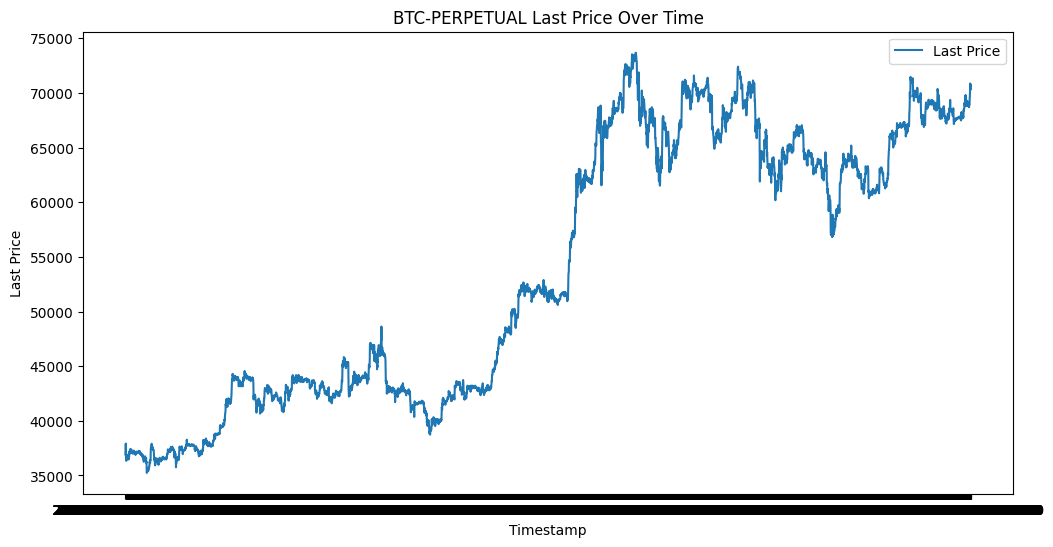

In [1]:
import requests
import time
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

class DataHandler:
    def __init__(self, db_name):
        self.db_name = db_name

    def _connect(self):
        """Create a connection to the SQLite database."""
        conn = sqlite3.connect(self.db_name)
        return conn

    def download_and_save(self, instrument_name, resolution):
        """Download historical data and save to the database."""
        end_timestamp = int(time.time() * 1000)  # current time in milliseconds
        start_timestamp = 0  # as far back as possible

        data = self._get_historical_data(instrument_name, resolution, start_timestamp, end_timestamp)
        if 'result' in data:
            ohlc = pd.DataFrame(data['result'])
            ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
            ohlc['instrument_name'] = instrument_name
            ohlc['resolution'] = int(resolution)
            
            conn = self._connect()
            ohlc.to_sql('ohlc', conn, if_exists='replace', index=False)
            conn.close()
            print("Data saved successfully to the database.")
        else:
            print("Error fetching data:", data)
    
    def _get_historical_data(self, instrument_name, resolution, start_timestamp, end_timestamp):
        """Fetch historical data from the API."""
        url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"
        params = {
            'instrument_name': instrument_name,
            'resolution': resolution,
            'start_timestamp': start_timestamp,
            'end_timestamp': end_timestamp
        }
        response = requests.get(url, params=params)
        data = response.json()
        return data

    def select_and_return(self):
        """Select data from the database and return as a DataFrame."""
        conn = self._connect()
        query = "SELECT * FROM ohlc"
        df = pd.read_sql(query, conn)
        conn.close()
        return df

    def display_data_plot(self):
        """Display a plot of the last price over time."""
        df = self.select_and_return()
        plt.figure(figsize=(12, 6))
        plt.plot(df['timestamp'], df['close'], label='Last Price')
        plt.xlabel('Timestamp')
        plt.ylabel('Last Price')
        plt.title('BTC-PERPETUAL Last Price Over Time')
        plt.legend()
        plt.show()

# Usage example
data_handler = DataHandler('07_datam.db')
data_handler.download_and_save("BTC-PERPETUAL", 60)
df = data_handler.select_and_return()
print(df.head())
data_handler.display_data_plot()
